Contents

1. Importing Libraries and Data Set
2. The Elbow Technique
3. k-Means Clustering
4. Grouping & Descriptive Stats
5. Exporting Data Set

# 1. Importing Libraries and Data Set

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Set path

path = r'/Users/danioprea/Desktop/Data Analytics/Coffee Quality Analysis - Dani Oprea'

In [4]:
# Import data set with pandas

df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'coffee_final.pkl'))

In [5]:
df.head(50)

,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,Harvest Year,Grading Date,...,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Rating Category
0,Colombia,Finca El Paraiso,Coffee Quality Union,1815.0,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,2021 / 2022,2022-09-21,...,10.0,8.58,89.33,11.8,0,0,green,3,"September 21st, 2023",High Rating
1,Taiwan,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200.0,Chiayi,曾福森,1,80 kg,2021 / 2022,2022-11-15,...,10.0,8.50,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",High Rating
2,Laos,OKLAO coffee farms,Taiwan Coffee Laboratory,1300.0,Laos Borofen Plateau,WU TAO CHI,19,25 kg,2021 / 2022,2022-11-15,...,10.0,8.33,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",High Rating
3,Costa Rica,La Cumbre,Coffee Quality Union,1900.0,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,2022,2022-09-21,...,10.0,8.25,87.17,11.8,0,0,green,0,"September 21st, 2023",High Rating
4,Colombia,Finca Santuario,Coffee Quality Union,1975.0,"Popayan,Cauca",Camilo Merizalde,2,24 kg,2022,2023-03-06,...,10.0,8.25,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",High Rating
5,Guatemala,La Colina,Taiwan Coffee Laboratory,1668.0,Chimaltenango,Emilio Antonio Medina Garcia,5,30 kg,2022,2022-11-15,...,10.0,8.25,87.00,10.7,0,0,green,2,"November 15th, 2023",High Rating
6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,Taiwan Coffee Laboratory,1250.0,Chiayi,黃保錫,1,27 kg,2021 / 2022,2022-11-15,...,10.0,8.25,86.92,9.1,0,0,green,0,"November 15th, 2023",High Rating
7,Taiwan,七彩琉璃咖啡莊園 Chi Tsai Liu Li Ecological Farm,Taiwan Coffee Laboratory,1200.0,Chiayi,莊家榮,1,90 kg,2021 / 2022,2022-11-15,...,10.0,8.08,86.75,10.0,0,0,yellow-green,1,"November 15th, 2023",High Rating
8,Taiwan,亮軒咖啡莊園 Liang Xuan Coffee Farm,Taiwan Coffee Laboratory,1250.0,Chiayi,鍾旭亮,1,30 kg,2021 / 2022,2022-11-15,...,10.0,8.25,86.67,10.8,0,0,greenish,0,"November 15th, 2023",High Rating
9,"Tanzania, United Republic Of",MASHIMA AMCOS,DORMAN (T) LIMITED,1550.0,KILIMANJARO,DORMAN (T) LIMITED,320,60 kg,2022 / 2023,2023-02-01,...,10.0,8.00,86.50,11.0,0,0,greenish,0,"February 1st, 2024",High Rating


In [6]:
df.shape

(197, 28)

In [7]:
# Create top countries subset

df_country = df[df['Country of Origin'].str.contains('Ethiopia|Tanzania, United Republic Of|Guatemala|Taiwan')]

In [7]:
df.columns

Index(['Country of Origin', 'Farm Name', 'Company', 'Altitude', 'Region',
       'Producer', 'Number of Bags', 'Bag Weight', 'Harvest Year',
       'Grading Date', 'Variety', 'Processing Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Overall',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Rating Category'],
      dtype='object')

In [8]:
# Create a new dataframe without categorical columns BUT ADDING Altitude and Moisture Percentage

df_cont = df_country[['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage', 'Category One Defects', 'Category Two Defects']]

In [9]:
df_cont.head(50)

,Altitude,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Category Two Defects
1,1200.0,8.50,8.50,7.92,8.00,7.92,8.25,8.50,87.58,10.5,0,0
5,1668.0,8.33,8.33,8.25,7.83,7.83,8.17,8.25,87.00,10.7,0,2
6,1250.0,8.33,8.17,8.08,8.00,7.83,8.25,8.25,86.92,9.1,0,0
7,1200.0,8.25,8.25,8.17,8.00,7.92,8.08,8.08,86.75,10.0,0,1
8,1250.0,8.08,8.08,8.25,8.08,7.92,8.00,8.25,86.67,10.8,0,0
9,1550.0,8.08,8.17,8.08,8.17,8.00,8.00,8.00,86.50,11.0,0,0
10,2000.0,8.08,8.25,8.00,8.08,7.92,7.92,8.00,86.25,11.8,0,1
11,2000.0,8.08,8.00,8.00,7.75,8.25,8.17,8.00,86.25,11.5,0,1
12,1250.0,8.08,8.00,8.08,8.08,8.00,8.00,8.00,86.25,11.9,0,0
13,1950.0,7.67,8.17,8.00,8.33,8.00,8.00,8.00,86.17,11.6,0,2


In [10]:
df_cont.shape

(96, 12)

#### Scale data

In [11]:
scaler=StandardScaler() #sets 'scaler' as a shortcut

In [12]:
# Create a list of the columns of the new dataframe

columns=df_cont.columns.values.tolist() 
columns #list the columns

['Altitude',
 'Aroma',
 'Flavor',
 'Aftertaste',
 'Acidity',
 'Body',
 'Balance',
 'Overall',
 'Total Cup Points',
 'Moisture Percentage',
 'Category One Defects',
 'Category Two Defects']

In [13]:
#run the scaler on the dataframe to create a new 'df_scaled'

df_scaled=pd.DataFrame(scaler.fit_transform(df_cont), columns=columns) 
df_scaled.head() #show scaled df

,Altitude,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Category Two Defects
0,-0.014261,2.668235,2.931156,0.955827,1.014069,1.019037,2.510961,3.183569,2.382921,0.132222,-0.102598,-0.613324
1,0.507508,1.998509,2.135605,2.517488,0.148504,0.562610,2.115145,2.025381,1.939053,0.345556,-0.102598,0.278783
2,0.041483,1.998509,1.386852,1.712996,1.014069,0.562610,2.510961,2.025381,1.877830,-1.361112,-0.102598,-0.613324
3,-0.014261,1.683344,1.761228,2.138904,1.014069,1.019037,1.669851,1.237813,1.747731,-0.401111,-0.102598,-0.167270
4,0.041483,1.013617,0.965678,2.517488,1.421394,1.019037,1.274035,2.025381,1.686507,0.452223,-0.102598,-0.613324


In [14]:
df_scaled.describe()

,Altitude,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Category Two Defects
count,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01
mean,-1.017704e-16,-1.859624e-15,-1.665335e-15,-3.210395e-15,1.850372e-16,1.517305e-15,1.369275e-15,1.286008e-15,-2.026157e-15,-8.557969e-16,9.251859e-18,3.700743e-17
std,1.005249e+00,1.005249e+00,1.005249e+00,1.005249e+00,1.005249e+00,1.005249e+00,1.005249e+00,1.005249e+00,1.005249e+00,1.005249e+00,1.005249e+00,1.005249e+00
min,-1.197160e+00,-2.256222e+00,-2.122931e+00,-1.836233e+00,-2.397277e+00,-2.378810e+00,-2.436746e+00,-2.236751e+00,-2.270041e+00,-2.427779e+00,-1.025978e-01,-6.133236e-01
25%,-8.044401e-01,-6.016045e-01,-5.786267e-01,-6.531569e-01,-6.661459e-01,-7.052434e-01,-8.040024e-01,-6.616149e-01,-6.782381e-01,-6.411115e-01,-1.025978e-01,-6.133236e-01
50%,1.361096e-02,2.872600e-02,2.169241e-01,-2.272493e-01,1.485039e-01,1.568968e-01,3.710780e-02,7.962542e-02,8.705172e-02,2.555557e-02,-1.025978e-01,-3.902968e-01
75%,4.316950e-01,6.984522e-01,5.913009e-01,5.299197e-01,6.067443e-01,5.626099e-01,5.442478e-01,4.965731e-01,6.610191e-01,6.655560e-01,-1.025978e-01,2.787834e-01
max,4.526131e+00,2.668235e+00,2.931156e+00,2.517488e+00,2.694284e+00,2.692603e+00,2.510961e+00,3.183569e+00,2.382921e+00,2.052223e+00,9.746794e+00,4.739319e+00


In [15]:
df_cont.head()

,Altitude,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Category Two Defects
1,1200.0,8.50,8.50,7.92,8.00,7.92,8.25,8.50,87.58,10.5,0,0
5,1668.0,8.33,8.33,8.25,7.83,7.83,8.17,8.25,87.00,10.7,0,2
6,1250.0,8.33,8.17,8.08,8.00,7.83,8.25,8.25,86.92,9.1,0,0
7,1200.0,8.25,8.25,8.17,8.00,7.92,8.08,8.08,86.75,10.0,0,1
8,1250.0,8.08,8.08,8.25,8.08,7.92,8.00,8.25,86.67,10.8,0,0


# 2. The Elbow Technique

In [16]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [17]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.

score

/Users/danioprea/PycharmProjects/Coffee_Quality_Data_Analysis/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/danioprea/PycharmProjects/Coffee_Quality_Data_Analysis/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/danioprea/PycharmProjects/Coffee_Quality_Data_Analysis/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/danioprea/Py

[-1152.0,
 -742.9951884257014,
 -601.0996897463956,
 -503.14234715555324,
 -418.58240837771086,
 -369.7299056099003,
 -330.1331023546155,
 -302.1093518330578,
 -277.4239699860805]

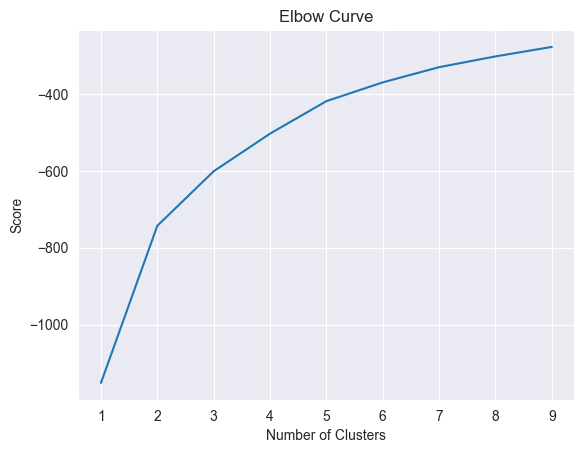

In [18]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

We'll try 3 clusters.

# 3. k-Means Clustering

In [19]:
# Create the k-means object

kmeans = KMeans(n_clusters=3)

In [20]:
# Fit the k-means object to the data

kmeans.fit(df_scaled)

/Users/danioprea/PycharmProjects/Coffee_Quality_Data_Analysis/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [21]:
df_scaled['clusters'] = kmeans.fit_predict(df_scaled)

/Users/danioprea/PycharmProjects/Coffee_Quality_Data_Analysis/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
df_scaled.head(50)

,Altitude,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Category Two Defects,clusters
0,-0.014261,2.668235,2.931156,0.955827,1.014069,1.019037,2.510961,3.183569,2.382921,0.132222,-0.102598,-0.613324,0
1,0.507508,1.998509,2.135605,2.517488,0.148504,0.562610,2.115145,2.025381,1.939053,0.345556,-0.102598,0.278783,0
2,0.041483,1.998509,1.386852,1.712996,1.014069,0.562610,2.510961,2.025381,1.877830,-1.361112,-0.102598,-0.613324,0
3,-0.014261,1.683344,1.761228,2.138904,1.014069,1.019037,1.669851,1.237813,1.747731,-0.401111,-0.102598,-0.167270,0
4,0.041483,1.013617,0.965678,2.517488,1.421394,1.019037,1.274035,2.025381,1.686507,0.452223,-0.102598,-0.613324,0
5,0.375950,1.013617,1.386852,1.712996,1.879635,1.424750,1.274035,0.867193,1.556408,0.665556,-0.102598,-0.613324,0
6,0.877651,1.013617,1.761228,1.334412,1.421394,1.019037,0.878218,0.867193,1.365086,1.518890,-0.102598,-0.167270,0
7,0.877651,1.013617,0.591301,1.334412,-0.258821,2.692603,2.115145,0.867193,1.365086,1.198890,-0.102598,-0.167270,0
8,0.041483,1.013617,0.591301,1.712996,1.421394,1.424750,1.274035,0.867193,1.365086,1.625557,-0.102598,-0.613324,0
9,0.821907,-0.601605,1.386852,1.334412,2.694284,1.424750,1.274035,0.867193,1.303863,1.305556,-0.102598,0.278783,0


In [23]:
df_scaled['clusters'].value_counts()

clusters
2    42
0    33
1    21
Name: count, dtype: int64

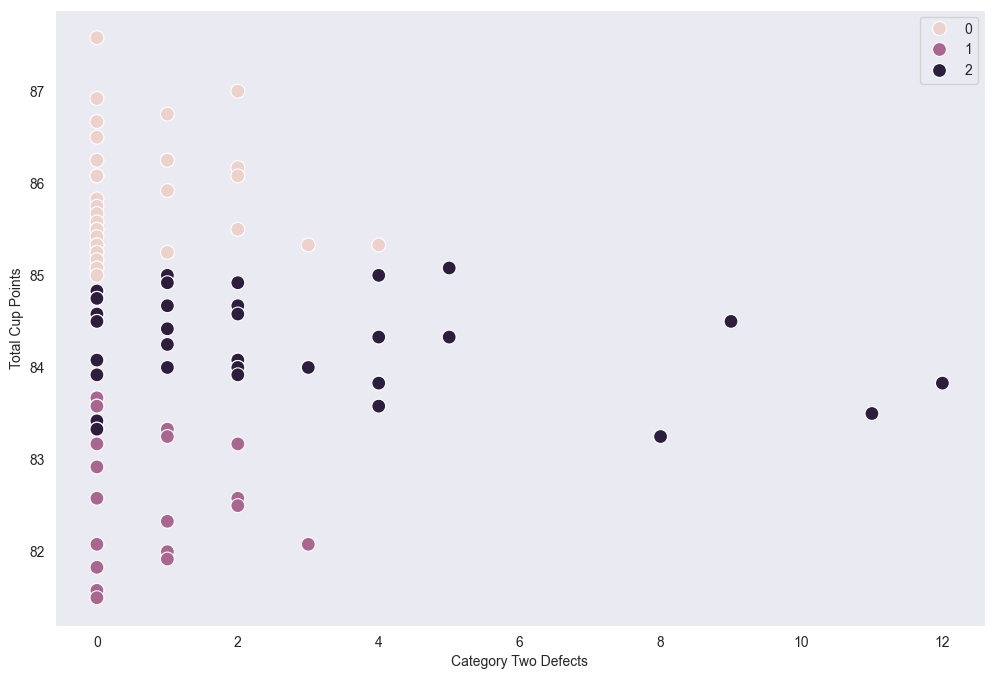

In [62]:
# Plot the clusters for the "Total Cup Points" and "Category Two Defects" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cont['Category Two Defects'], y=df_cont['Total Cup Points'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Category Two Defects') # Label x-axis.
plt.ylabel('Total Cup Points') # Label y-axis.
plt.show()

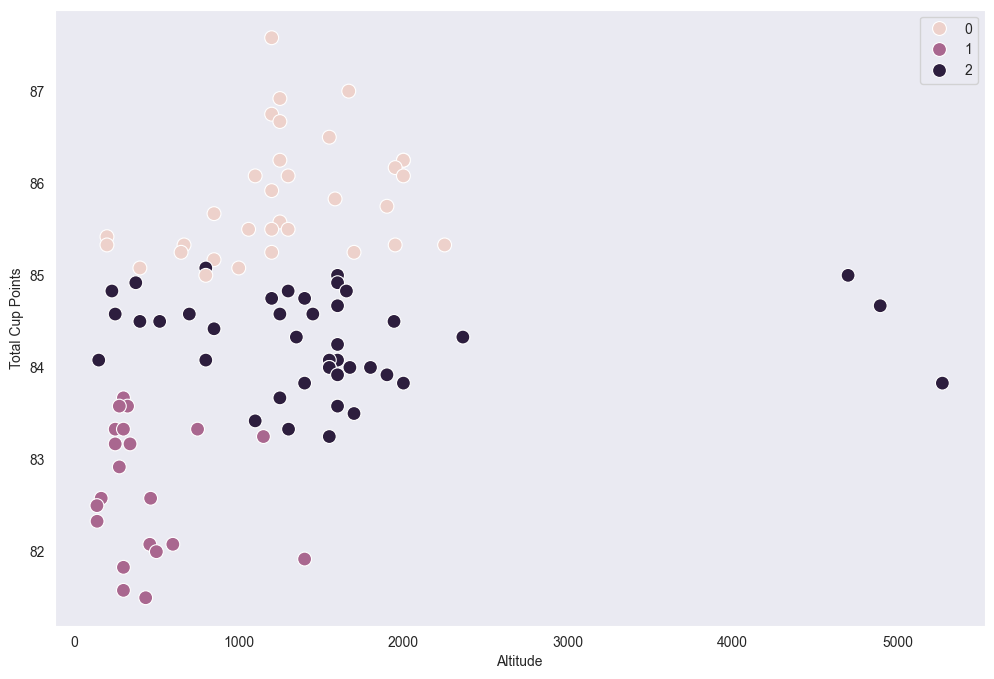

In [43]:
# Plot the clusters for the "Total Cup Points" and "Altitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cont['Altitude'], y=df_cont['Total Cup Points'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Altitude') # Label x-axis.
plt.ylabel('Total Cup Points') # Label y-axis.
plt.show()

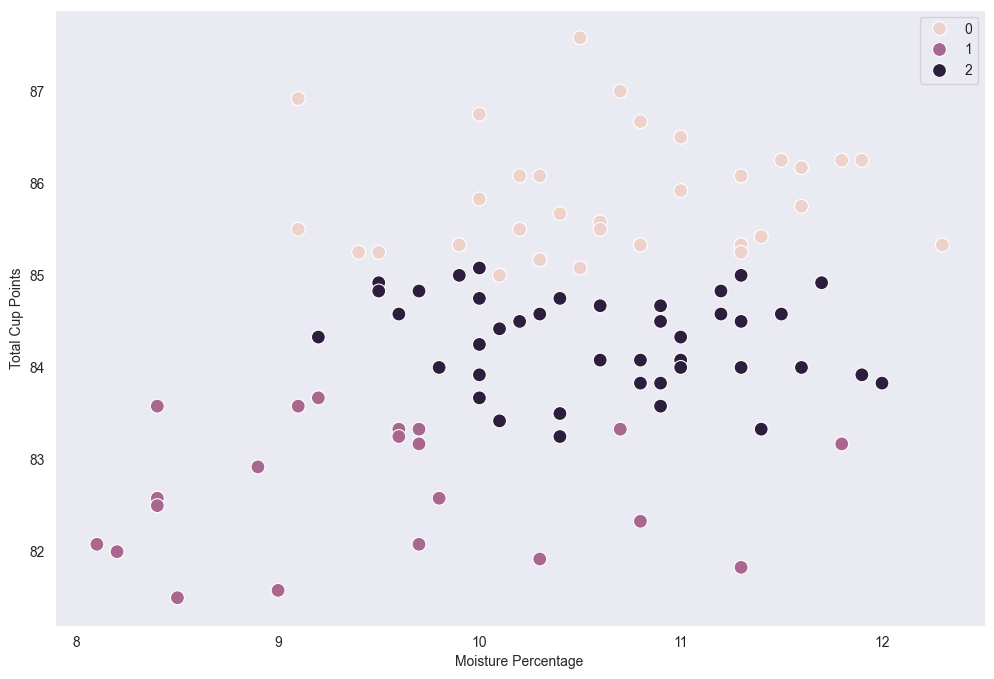

In [25]:
# Plot the clusters for the "Total Cup Points" and "Moisture Percentage" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cont['Moisture Percentage'], y=df_cont['Total Cup Points'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Moisture Percentage') # Label x-axis.
plt.ylabel('Total Cup Points') # Label y-axis.
plt.show()

In [50]:
# Add clusters from df_scaled to original dataframe

df_country['clusters'] = df_scaled['clusters'].to_numpy()
df_country.head(50)

/var/folders/q4/1gjxbf_s0jbclz3c0q66rpdh0000gn/T/ipykernel_19782/808508771.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,Harvest Year,Grading Date,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Rating Category,clusters,cluster
1,Taiwan,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200.0,Chiayi,曾福森,1,80 kg,2021 / 2022,2022-11-15,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",High Rating,0,brown
5,Guatemala,La Colina,Taiwan Coffee Laboratory,1668.0,Chimaltenango,Emilio Antonio Medina Garcia,5,30 kg,2022,2022-11-15,...,87.00,10.7,0,0,green,2,"November 15th, 2023",High Rating,0,brown
6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,Taiwan Coffee Laboratory,1250.0,Chiayi,黃保錫,1,27 kg,2021 / 2022,2022-11-15,...,86.92,9.1,0,0,green,0,"November 15th, 2023",High Rating,0,brown
7,Taiwan,七彩琉璃咖啡莊園 Chi Tsai Liu Li Ecological Farm,Taiwan Coffee Laboratory,1200.0,Chiayi,莊家榮,1,90 kg,2021 / 2022,2022-11-15,...,86.75,10.0,0,0,yellow-green,1,"November 15th, 2023",High Rating,0,brown
8,Taiwan,亮軒咖啡莊園 Liang Xuan Coffee Farm,Taiwan Coffee Laboratory,1250.0,Chiayi,鍾旭亮,1,30 kg,2021 / 2022,2022-11-15,...,86.67,10.8,0,0,greenish,0,"November 15th, 2023",High Rating,0,brown
9,"Tanzania, United Republic Of",MASHIMA AMCOS,DORMAN (T) LIMITED,1550.0,KILIMANJARO,DORMAN (T) LIMITED,320,60 kg,2022 / 2023,2023-02-01,...,86.50,11.0,0,0,greenish,0,"February 1st, 2024",High Rating,0,brown
10,Ethiopia,TADE GG,"Marubeni corp.,",2000.0,Guji,Tesfaye Bekele Degaga,10,30 kg,2021 / 2022,2022-05-31,...,86.25,11.8,0,1,greenish,1,"May 31st, 2023",High Rating,0,brown
11,Guatemala,Karen Acajabon Coffee Farm,Taiwan Coffee Laboratory,2000.0,Acatenango,Karen Acajabon,5,15 kg,2021,2022-11-15,...,86.25,11.5,0,0,brownish,1,"November 15th, 2023",High Rating,0,brown
12,Taiwan,古峰咖啡莊園 Goodfun Coffee Farm,Taiwan Coffee Laboratory,1250.0,Yunlin,賴彥合,1,60 kg,2021 / 2022,2022-11-15,...,86.25,11.9,0,0,green,0,"November 15th, 2023",High Rating,0,brown
13,Ethiopia,Gelana Geisha,Kerchanshe Trading PLC,1950.0,Guji,Kerchanshe,40,60 kg,2021 / 2022,2022-08-26,...,86.17,11.6,0,3,yellow-green,2,"August 26th, 2023",High Rating,0,brown


In [57]:
# Create a box and whisker plot of moisture percentage grouped by the clusters

fig = px.box(df_country, x='clusters', y='Moisture Percentage', title='Box and Whisker Plot of Moisture Percentages Grouped by Clusters')
fig.show()

In [58]:
# Create a box and whisker plot of altitude grouped by the clusters

fig = px.box(df_country, x='clusters', y='Altitude', title='Box and Whisker Plot of Altitude Grouped by Clusters')
fig.show()

In [59]:
# Create a box and whisker plot of altitude grouped by the clusters without outliers over 3000

df_alt = df_country[df_country['Altitude'] < 3000]

fig = px.box(df_alt, x='clusters', y='Altitude', title='Box and Whisker Plot of Altitude Grouped by Clusters')
fig.show()

#### Clustering Thoughts

We've actually found some interesting insights from the cluster analysis on the top countries subset that we didn't see before. The cluster analysis on Moisture Percentage isn't too significant apart from that it looks like the lower-rated coffees have a moisture percentage that goes lower than 9. However, that is more detail than before when we looked at the entire data set and we saw that the clusters were all pretty similar. So we could say that higher quality coffees have moisture percentages over 9%.

The biggest insight comes in altitude. The lowest-quality coffee also has the lowest altitude out of all three clusters. In the cluster analysis of the whole data set, there was no difference really in altitude when it came to coffee quality but now we see one. Unlike Moisture Percentage where there is some overlap still in the low quality coffee moisture percentage with the higher quality coffees, there is barely any at all when looking at altitude. It's also interesting to see that the highest quality coffee seems to have a median around 1200 whereas the middle coffee has one around 1450. We did see something similar where the highest rated coffees in the whole dataset also had a median around 1200. It could be that 1200 is the ideal altitude for coffee growing. That would be something for another analysis.

# 4. Grouping & Descriptive Stats

In [52]:
# Create descriptive column for cluster colors

df_country.loc[df_country['clusters'] == 2, 'cluster'] = 'pink'
df_country.loc[df_country['clusters'] == 1, 'cluster'] = 'purple'
df_country.loc[df_country['clusters'] == 0, 'cluster'] = 'brown'

In [53]:
df_country.head(50)

,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,Harvest Year,Grading Date,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Rating Category,clusters,cluster
1,Taiwan,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200.0,Chiayi,曾福森,1,80 kg,2021 / 2022,2022-11-15,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",High Rating,0,brown
5,Guatemala,La Colina,Taiwan Coffee Laboratory,1668.0,Chimaltenango,Emilio Antonio Medina Garcia,5,30 kg,2022,2022-11-15,...,87.00,10.7,0,0,green,2,"November 15th, 2023",High Rating,0,brown
6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,Taiwan Coffee Laboratory,1250.0,Chiayi,黃保錫,1,27 kg,2021 / 2022,2022-11-15,...,86.92,9.1,0,0,green,0,"November 15th, 2023",High Rating,0,brown
7,Taiwan,七彩琉璃咖啡莊園 Chi Tsai Liu Li Ecological Farm,Taiwan Coffee Laboratory,1200.0,Chiayi,莊家榮,1,90 kg,2021 / 2022,2022-11-15,...,86.75,10.0,0,0,yellow-green,1,"November 15th, 2023",High Rating,0,brown
8,Taiwan,亮軒咖啡莊園 Liang Xuan Coffee Farm,Taiwan Coffee Laboratory,1250.0,Chiayi,鍾旭亮,1,30 kg,2021 / 2022,2022-11-15,...,86.67,10.8,0,0,greenish,0,"November 15th, 2023",High Rating,0,brown
9,"Tanzania, United Republic Of",MASHIMA AMCOS,DORMAN (T) LIMITED,1550.0,KILIMANJARO,DORMAN (T) LIMITED,320,60 kg,2022 / 2023,2023-02-01,...,86.50,11.0,0,0,greenish,0,"February 1st, 2024",High Rating,0,brown
10,Ethiopia,TADE GG,"Marubeni corp.,",2000.0,Guji,Tesfaye Bekele Degaga,10,30 kg,2021 / 2022,2022-05-31,...,86.25,11.8,0,1,greenish,1,"May 31st, 2023",High Rating,0,brown
11,Guatemala,Karen Acajabon Coffee Farm,Taiwan Coffee Laboratory,2000.0,Acatenango,Karen Acajabon,5,15 kg,2021,2022-11-15,...,86.25,11.5,0,0,brownish,1,"November 15th, 2023",High Rating,0,brown
12,Taiwan,古峰咖啡莊園 Goodfun Coffee Farm,Taiwan Coffee Laboratory,1250.0,Yunlin,賴彥合,1,60 kg,2021 / 2022,2022-11-15,...,86.25,11.9,0,0,green,0,"November 15th, 2023",High Rating,0,brown
13,Ethiopia,Gelana Geisha,Kerchanshe Trading PLC,1950.0,Guji,Kerchanshe,40,60 kg,2021 / 2022,2022-08-26,...,86.17,11.6,0,3,yellow-green,2,"August 26th, 2023",High Rating,0,brown


In [54]:
df_country['cluster'].value_counts(dropna=False)

cluster
pink      42
brown     33
purple    21
Name: count, dtype: int64

In [61]:
# Use groupby to look at descriptive stats

df_country.groupby('cluster').agg({'Total Cup Points':['mean', 'median'],
                         'Category Two Defects':['mean', 'median', 'min', 'max'],
                         'Altitude':['mean', 'median', 'min', 'max'],
                         'Moisture Percentage':['mean', 'median', 'min', 'max']})

Total Cup Points        Category Two Defects                 \
                    mean median                 mean median min max   
cluster                                                               
brown          85.837879  85.67             0.606061    0.0   0   4   
pink           84.280952  84.33             2.309524    1.5   0  12   
purple         82.681429  82.58             0.714286    0.0   0   3   

            Altitude                        Moisture Percentage              \
                mean  median    min     max                mean median  min   
cluster                                                                       
brown    1270.636364  1250.0  200.0  2250.0           10.636364   10.6  9.1   
pink     1556.619048  1550.0  150.0  5272.5           10.616667   10.7  9.2   
purple    434.238095   300.0  139.0  1400.0            9.485714    9.6  8.1   

               
          max  
cluster        
brown    12.3  
pink     12.0  
purple   11.8

In [63]:
# Update the df_alt subset to include the cluster column so that we can look descriptive stats

df_alt = df_country[df_country['Altitude'] < 3000]

df_alt.groupby('cluster').agg({'Total Cup Points':['mean', 'median'],
                         'Category Two Defects':['mean', 'median', 'min', 'max'],
                         'Altitude':['mean', 'median', 'min', 'max'],
                         'Moisture Percentage':['mean', 'median', 'min', 'max']})

Total Cup Points        Category Two Defects                 \
                    mean median                 mean median min max   
cluster                                                               
brown          85.837879  85.67             0.606061    0.0   0   4   
pink           84.264103  84.33             2.230769    1.0   0  12   
purple         82.681429  82.58             0.714286    0.0   0   3   

            Altitude                        Moisture Percentage              \
                mean  median    min     max                mean median  min   
cluster                                                                       
brown    1270.636364  1250.0  200.0  2250.0           10.636364   10.6  9.1   
pink     1295.141026  1450.0  150.0  2361.0           10.584615   10.6  9.2   
purple    434.238095   300.0  139.0  1400.0            9.485714    9.6  8.1   

               
          max  
cluster        
brown    12.3  
pink     12.0  
purple   11.8

#### Descriptive Stats Thoughts

The descriptive stats support our thoughts about the clusters. It also shows us that category two defects are less of an indicator of quality once we start looking at the highest-quality coffee.

# 5. Exporting Data Set

In [60]:
# Export our dataframe

df_country.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'coffee_final_clusters_country_subset.pkl'))